In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [2]:
import jax
import jax.numpy as jnp
from jax import vmap

import optax

import numpy as np
from functools import partial

In [3]:
# copied from https://github.com/DSKSD/DeepNLP-models-Pytorch/tree/master

flatten = lambda l: [item for sublist in l for item in sublist]

def prepare_sequence(seq, to_index):
    idxs = list(map(lambda w: to_index[w] if to_index.get(w) is not None else to_index["<unk>"], seq))
    return idxs

def prepare_ptb_dataset(filename, word2index=None):
    corpus = open(filename, 'r', encoding='utf-8').readlines()
    corpus = flatten([co.strip().split() + ['</s>'] for co in corpus])
    
    if word2index == None:
        vocab = list(set(corpus))
        word2index = {'<unk>': 0}
        for vo in vocab:
            if word2index.get(vo) is None:
                word2index[vo] = len(word2index)
    
    return prepare_sequence(corpus, word2index), word2index


train_data, word2index = prepare_ptb_dataset('../ironhide/datasets/ptb/ptb.train.txt',)
dev_data , _ = prepare_ptb_dataset('../ironhide/datasets/ptb/ptb.valid.txt', word2index)
test_data, _ = prepare_ptb_dataset('../ironhide/datasets/ptb/ptb.test.txt', word2index)

In [30]:
BATCH_SIZE = 100

VOCAB_SIZE = 10000
EMBED_SIZE = 64
HIDDEN_SIZE = 32

In [31]:
# borrowed code from https://github.com/pytorch/examples/tree/master/word_language_model
def batchify(data, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = int(len(data) / bsz)
    
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = data[0: nbatch * bsz]
    
    # Evenly divide the data across the bsz batches.
    data = np.reshape(data, (bsz, -1))
    return data


train_data = batchify(train_data, BATCH_SIZE)
dev_data = batchify(dev_data, BATCH_SIZE//2)
test_data = batchify(test_data, BATCH_SIZE//2)

In [32]:
train_data.shape

(100, 9292)

In [33]:
from ironhide.models.rnn import ToyRNN

In [34]:
layer_sizes = [VOCAB_SIZE, EMBED_SIZE, HIDDEN_SIZE]

In [35]:
toy_rnn = ToyRNN(layer_sizes)

In [36]:
training_losses = toy_rnn.fit(train_data, seq_length=8, max_iter=500)

9.210332
9.196235
9.1442585
9.021426
8.843581
8.566142
8.279136
8.057715
7.8017063
7.544209
7.4141912
7.2681303
7.130321
6.976433
6.891679
6.930152
6.954357
6.9107823
6.9933214
6.9568186
7.0555573
6.9841003
7.052563
6.9837475
7.2074533
7.0360703
7.1297913
7.2954264
7.1510925
6.8956223
7.169015
7.1527796
6.959667
6.9115567
6.9632096
7.095815
7.1992373
7.2657056
6.9459934
7.0386815
7.1011987
7.0226693
7.2957115
6.9610863
6.9926744
6.9223294
6.86336
6.9864597
7.1788597
6.882137
6.953119
6.9041076
6.862512
6.8227634
6.86561
6.877152
6.8058324
6.7857914
6.814853
6.6911697
6.8264227
6.7979565
6.6703563
6.7713976
6.696469
6.933451
6.6649413
6.782641
6.8120165
6.7059264
6.676217
6.785879
6.9199467
6.8755655
6.831278
6.6198163
6.7888885
6.505158
6.5362267
6.7496786
6.676518
6.7374883
6.638535
6.601127
6.6576414
6.6096478
6.608624
6.6618285
6.6408243
6.617655
6.557988
6.654204
6.5584116
6.426489
6.5937634
6.490703
6.476086
6.4601035
6.613132
6.450916
6.58074
6.5737305
6.5629344
6.699541
6.579101

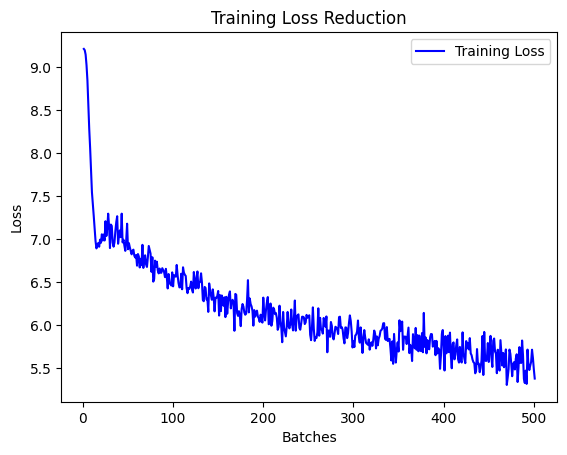

In [37]:
import matplotlib.pyplot as plt

%matplotlib inline

batches = range(1, len(training_losses) + 1)

# Plotting the training loss
plt.plot(batches, training_losses, 'b', label='Training Loss')
plt.title('Training Loss Reduction')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
ba